In [17]:
from sklearn.datasets import make_classification
import numpy as np
x, y = make_classification(n_samples = 100, n_features = 2, n_informative = 1, n_redundant = 0,
                           n_classes = 2, n_clusters_per_class = 1, random_state = 41, hypercube = False, class_sep = 10)

In [18]:
import matplotlib.pyplot as plt

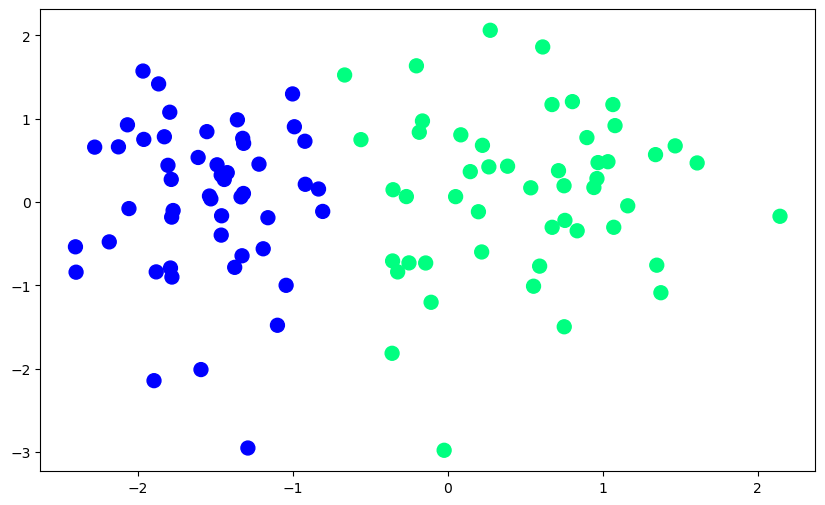

In [19]:
plt.figure(figsize = (10,6))
plt.scatter(x[:,0],x[:,1], c = y, cmap = 'winter', s =100)

In [20]:
def perceptron(x,y):

    x = np.insert(x,0,1,axis = 1) # insterting bias
    weights = np.ones(x.shape[1]) # assigning initial weights as 1
    lr = 0.1
    epochs = 1000

    for i in range(epochs):
        j = np.random.randint(0,100) # randomly picking up one point
        y_pred = step(np.dot(x[j],weights)) #making prediction
        weights = weights + lr*(y[j]-y_pred)*x[j] #updating weights

    return weights[0],weights[1:]

In [21]:
def step(z):
    return 1 if z > 0 else 0

In [22]:
intercept_, coeff = perceptron(x,y)

In [23]:
print(coeff)
print(intercept_)

[1.2989313  0.12108252]
0.9


In [24]:
m = -(coeff[0]/coeff[1])
b = -(intercept_/coeff[1])

In [25]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

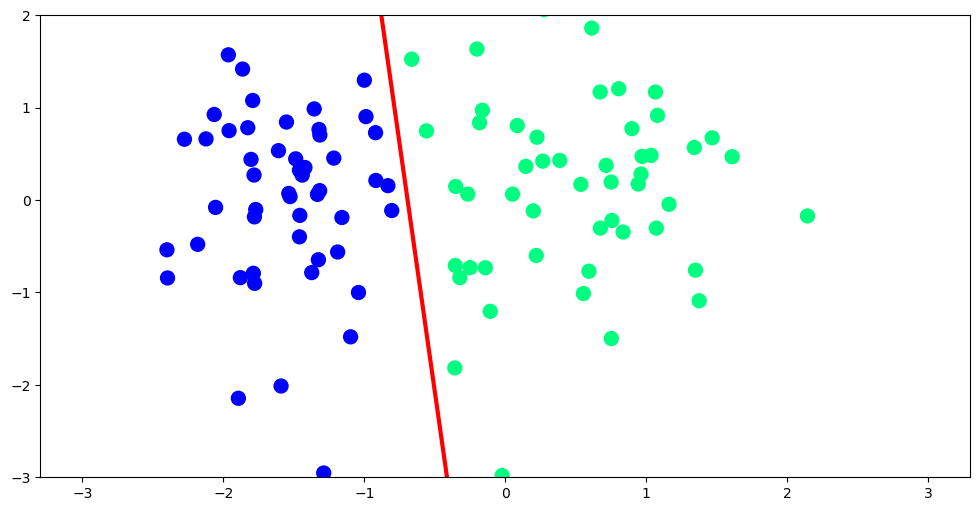

In [26]:
plt.figure(figsize = (12,6))
plt.plot(x_input, y_input, color = 'red', linewidth = 3)
plt.scatter(x[:,0],x[:,1],c = y, cmap = 'winter', s = 100)
plt.ylim(-3,2)

In [27]:
def perceptron_ani(x,y):

    m = []
    b = []
    
    x = np.insert(x,0,1,axis = 1) # insterting bias
    weights = np.ones(x.shape[1]) # assigning initial weights as 1
    lr = 0.1
    epochs = 1000

    for i in range(epochs):
        j = np.random.randint(0,100) # randomly picking up one point
        y_pred = step(np.dot(x[j],weights)) #making prediction
        weights = weights + lr*(y[j]-y_pred)*x[j] #updating weights

        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))

    return m,b

In [29]:
m, b = perceptron_ani(x,y)

In [31]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [34]:
fig, ax = plt.subplots(figsize = (9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] + b[0]
ax.scatter(x[:,0],x[:,1],c = y, cmap = 'winter', s = 100)
line, = ax.plot(x_input, y_input, color = 'red', linewidth = 3)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)



<IPython.core.display.Javascript object>

In [36]:
anim = FuncAnimation(fig,update, repeat = True, frames = 200, interval = 100)

C:\Users\rajee\anaconda3\Lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
